In [3]:
import os
import pandas as pd
from pathlib import Path

# Metadata

In [38]:
ds = pd.read_csv('/home/bruno-pacheco/brain-age/MAPER_6_28_2022.csv')
ds.head()

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
0,I220542,011_S_0002,CN,M,74,1,MRI,MAPER segmentation,Post-processed,8/26/2005,NiFTI,6/23/2022
1,I220441,011_S_0005,CN,M,74,1,MRI,MAPER segmentation,Post-processed,9/02/2005,NiFTI,6/23/2022
2,I220442,011_S_0008,CN,F,85,1,MRI,MAPER segmentation,Post-processed,9/13/2005,NiFTI,6/23/2022
3,I220463,100_S_0015,CN,M,81,1,MRI,MAPER segmentation,Post-processed,9/26/2005,NiFTI,6/23/2022
4,I220444,011_S_0016,CN,M,66,1,MRI,MAPER segmentation,Post-processed,9/27/2005,NiFTI,6/23/2022


In [39]:
df = pd.read_csv('/home/bruno-pacheco/brain-age/MAPER_BRAINS_6_28_2022.csv')
df['Seg ID'] = None
df

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded,Seg ID
0,I35475,011_S_0002,CN,M,74,1,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,8/26/2005,NiFTI,NaN,None
1,I32246,011_S_0005,CN,M,74,1,MRI,MPR-R; GradWarp; B1 Correction; N3; Scaled,Processed,9/02/2005,NiFTI,NaN,None
2,I32264,011_S_0008,CN,F,85,1,MRI,MPR-R; GradWarp; B1 Correction; N3; Scaled,Processed,9/13/2005,NiFTI,NaN,None
3,I33066,100_S_0015,CN,M,81,1,MRI,MPR-R; ; N3; Scaled,Processed,9/26/2005,NiFTI,NaN,None
4,I32306,011_S_0016,CN,M,66,1,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,9/27/2005,NiFTI,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,I60641,020_S_1288,CN,M,60,2,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,3/13/2007,NiFTI,NaN,None
281,I80718,094_S_1267,CN,M,73,1,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,3/16/2007,NiFTI,NaN,None
282,I75503,094_S_1267,CN,M,73,2,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,3/22/2007,NiFTI,NaN,None
283,I71395,013_S_1276,CN,F,72,2,MRI,MPR; GradWarp; N3; Scaled,Processed,3/28/2007,NiFTI,NaN,None


In [40]:
maper_ids = list()
for i in range(df.shape[0]):
    s = df.iloc[i]
    d = ds[(ds['Subject'] == s['Subject']) & (ds['Acq Date'] == s['Acq Date'])].iloc[0]

    df.iloc[i,-1] = d['Image Data ID']
df.head()

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded,Seg ID
0,I35475,011_S_0002,CN,M,74,1,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,8/26/2005,NiFTI,NaN,I220542
1,I32246,011_S_0005,CN,M,74,1,MRI,MPR-R; GradWarp; B1 Correction; N3; Scaled,Processed,9/02/2005,NiFTI,NaN,I220441
2,I32264,011_S_0008,CN,F,85,1,MRI,MPR-R; GradWarp; B1 Correction; N3; Scaled,Processed,9/13/2005,NiFTI,NaN,I220442
3,I33066,100_S_0015,CN,M,81,1,MRI,MPR-R; ; N3; Scaled,Processed,9/26/2005,NiFTI,NaN,I220463
4,I32306,011_S_0016,CN,M,66,1,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,9/27/2005,NiFTI,NaN,I220444


In [41]:
df.sample()

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded,Seg ID
220,I39203,130_S_0969,CN,M,70,2,MRI,MPR; ; N3; Scaled,Processed,11/06/2006,NiFTI,8/17/2020,I220645


In [42]:
ds[ds['Image Data ID'] == 'I220645']

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
221,I220645,130_S_0969,CN,M,70,2,MRI,MAPER segmentation,Post-processed,11/06/2006,NiFTI,6/23/2022


# Data check

In [49]:
maper_dir = Path('/data/slow/MAPER/ADNI')
!ls {maper_dir}

002_S_0295  012_S_1212	027_S_0118  052_S_1251	099_S_0533  128_S_0545
002_S_0413  013_S_0502	027_S_0120  057_S_0643	099_S_0534  128_S_0863
002_S_0559  013_S_0575	027_S_0403  057_S_0779	100_S_0015  128_S_1242
002_S_0685  013_S_1035	029_S_0824  057_S_0818	100_S_0035  129_S_0778
002_S_1261  013_S_1276	029_S_0843  057_S_0934	100_S_0047  130_S_0232
002_S_1280  014_S_0519	029_S_0845  062_S_0578	100_S_0069  130_S_0886
003_S_0907  014_S_0520	029_S_0866  062_S_0768	100_S_1286  130_S_0969
003_S_0931  014_S_0548	031_S_0618  062_S_1099	109_S_0876  130_S_1200
003_S_0981  014_S_0558	032_S_0095  067_S_0019	109_S_0967  131_S_0123
003_S_1021  016_S_0359	032_S_0479  067_S_0056	109_S_1013  131_S_0319
005_S_0223  016_S_0538	032_S_0677  067_S_0059	109_S_1014  131_S_0436
005_S_0553  018_S_0043	032_S_1169  067_S_0177	114_S_0166  131_S_0441
005_S_0602  018_S_0055	033_S_0516  067_S_0257	114_S_0173  131_S_1301
005_S_0610  018_S_0369	033_S_0734  068_S_0127	114_S_0416  133_S_0433
006_S_0498  018_S_0425	033_S_0741 

In [78]:
df['IMG'] = None
df['SEG'] = None

for i in range(df.shape[0]):
    s = df.loc[i]

    subject_dir = maper_dir/s['Subject']

    assert len(list(subject_dir.glob(f"**/*{s['Image Data ID']}*"))) == 1, 'img'
    assert len(list(subject_dir.glob(f"**/*{s['Seg ID']}*"))) == 1, 'seg'

    img_fpath = next(subject_dir.glob(f"**/*{s['Image Data ID']}*"))
    seg_fpath = next(subject_dir.glob(f"**/*{s['Seg ID']}*"))

    df.loc[i,'IMG'] = str(img_fpath)
    df.loc[i,'SEG'] = str(seg_fpath)

assert df['IMG'].apply(os.path.exists).all()
assert df['SEG'].apply(os.path.exists).all()

In [79]:
df.head()

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded,Seg ID,IMG,SEG
0,I35475,011_S_0002,CN,M,74,1,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,8/26/2005,NiFTI,NaN,I220542,/data/slow/MAPER/ADNI/011_S_0002/MPR__GradWarp...,/data/slow/MAPER/ADNI/011_S_0002/MAPER_segment...
1,I32246,011_S_0005,CN,M,74,1,MRI,MPR-R; GradWarp; B1 Correction; N3; Scaled,Processed,9/02/2005,NiFTI,NaN,I220441,/data/slow/MAPER/ADNI/011_S_0005/MPR-R__GradWa...,/data/slow/MAPER/ADNI/011_S_0005/MAPER_segment...
2,I32264,011_S_0008,CN,F,85,1,MRI,MPR-R; GradWarp; B1 Correction; N3; Scaled,Processed,9/13/2005,NiFTI,NaN,I220442,/data/slow/MAPER/ADNI/011_S_0008/MPR-R__GradWa...,/data/slow/MAPER/ADNI/011_S_0008/MAPER_segment...
3,I33066,100_S_0015,CN,M,81,1,MRI,MPR-R; ; N3; Scaled,Processed,9/26/2005,NiFTI,NaN,I220463,/data/slow/MAPER/ADNI/100_S_0015/MPR-R____N3__...,/data/slow/MAPER/ADNI/100_S_0015/MAPER_segment...
4,I32306,011_S_0016,CN,M,66,1,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,9/27/2005,NiFTI,NaN,I220444,/data/slow/MAPER/ADNI/011_S_0016/MPR__GradWarp...,/data/slow/MAPER/ADNI/011_S_0016/MAPER_segment...


In [80]:
s = df.sample().iloc[0]
s

Image Data ID                                               I65561
Subject                                                 002_S_1261
Group                                                           CN
Sex                                                              F
Age                                                             71
Visit                                                            2
Modality                                                       MRI
Description                                      MPR; ; N3; Scaled
Type                                                     Processed
Acq Date                                                 2/27/2007
Format                                                       NiFTI
Downloaded                                               8/18/2020
Seg ID                                                     I221140
IMG              /data/slow/MAPER/ADNI/002_S_1261/MPR____N3__Sc...
SEG              /data/slow/MAPER/ADNI/002_S_1261/MAPER_segmen

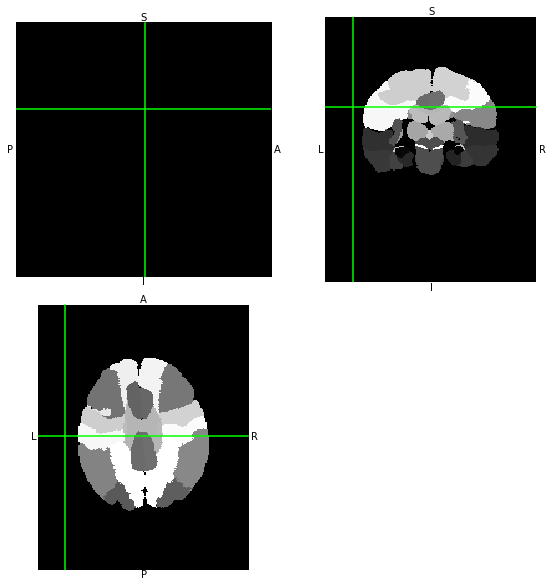

In [84]:
from brats.utils import show_mri

show_mri(s['SEG'], pos=(0,0,0))

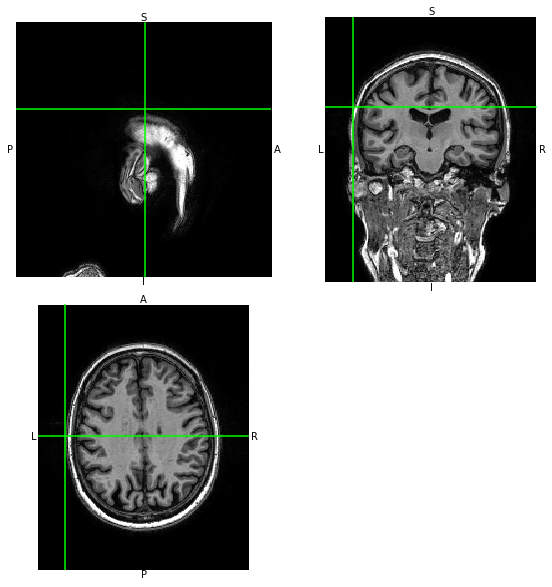

In [85]:
from brats.utils import show_mri

show_mri(s['IMG'], pos=(0,0,0))

In [100]:
df_split = pd.read_csv('/home/bruno-pacheco/brain-age/notebooks/dataframe3D.csv', index_col=0)
df_split['id'] = df_split['patient'].str.replace('ADNI_','')
df_split['id'].value_counts()

116_S_0382    16
023_S_0031    16
023_S_1190    15
023_S_0926    14
116_S_1249    14
              ..
130_S_6319     1
168_S_6098     1
094_S_6485     1
082_S_6415     1
141_S_6423     1
Name: id, Length: 666, dtype: int64

In [106]:
df['split'] = None

for i in range(df.shape[0]):
    s = df.loc[i]

    try:
        split = df_split[df_split['id'] == s['Subject']]['split'].iloc[0]
    except IndexError:
        split = 'train'
    df.loc[i,'split'] = split

assert df['split'].isin(['train', 'val', 'test']).all()

In [107]:
df['split'].value_counts()

train    167
test      61
val       57
Name: split, dtype: int64

In [110]:
df.to_pickle('/data/slow/MAPER/prep/metadata.pkl')

# Preprocessing

In [3]:
import pickle5 as pickle

with open('/home/jupyter/data/ADNI/MAPER/prep/metadata.pkl', 'rb') as f:
    df = pickle.load(f)
# df = pd.read_pickle('/home/jupyter/data/ADNI/MAPER/prep/metadata.pkl')
df

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded,Seg ID,IMG,SEG,split
0,I35475,011_S_0002,CN,M,74,1,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,8/26/2005,NiFTI,NaN,I220542,/data/slow/MAPER/ADNI/011_S_0002/MPR__GradWarp...,/data/slow/MAPER/ADNI/011_S_0002/MAPER_segment...,test
1,I32246,011_S_0005,CN,M,74,1,MRI,MPR-R; GradWarp; B1 Correction; N3; Scaled,Processed,9/02/2005,NiFTI,NaN,I220441,/data/slow/MAPER/ADNI/011_S_0005/MPR-R__GradWa...,/data/slow/MAPER/ADNI/011_S_0005/MAPER_segment...,train
2,I32264,011_S_0008,CN,F,85,1,MRI,MPR-R; GradWarp; B1 Correction; N3; Scaled,Processed,9/13/2005,NiFTI,NaN,I220442,/data/slow/MAPER/ADNI/011_S_0008/MPR-R__GradWa...,/data/slow/MAPER/ADNI/011_S_0008/MAPER_segment...,train
3,I33066,100_S_0015,CN,M,81,1,MRI,MPR-R; ; N3; Scaled,Processed,9/26/2005,NiFTI,NaN,I220463,/data/slow/MAPER/ADNI/100_S_0015/MPR-R____N3__...,/data/slow/MAPER/ADNI/100_S_0015/MAPER_segment...,val
4,I32306,011_S_0016,CN,M,66,1,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,9/27/2005,NiFTI,NaN,I220444,/data/slow/MAPER/ADNI/011_S_0016/MPR__GradWarp...,/data/slow/MAPER/ADNI/011_S_0016/MAPER_segment...,val
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,I60641,020_S_1288,CN,M,60,2,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,3/13/2007,NiFTI,NaN,I220993,/data/slow/MAPER/ADNI/020_S_1288/MPR__GradWarp...,/data/slow/MAPER/ADNI/020_S_1288/MAPER_segment...,test
281,I80718,094_S_1267,CN,M,73,1,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,3/16/2007,NiFTI,NaN,I221288,/data/slow/MAPER/ADNI/094_S_1267/MPR__GradWarp...,/data/slow/MAPER/ADNI/094_S_1267/MAPER_segment...,val
282,I75503,094_S_1267,CN,M,73,2,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,3/22/2007,NiFTI,NaN,I221262,/data/slow/MAPER/ADNI/094_S_1267/MPR__GradWarp...,/data/slow/MAPER/ADNI/094_S_1267/MAPER_segment...,val
283,I71395,013_S_1276,CN,F,72,2,MRI,MPR; GradWarp; N3; Scaled,Processed,3/28/2007,NiFTI,NaN,I221235,/data/slow/MAPER/ADNI/013_S_1276/MPR__GradWarp...,/data/slow/MAPER/ADNI/013_S_1276/MAPER_segment...,train


In [7]:
s = df.sample().iloc[0]
s

Image Data ID                                               I34362
Subject                                                 127_S_0259
Group                                                           CN
Sex                                                              M
Age                                                             71
Visit                                                            1
Modality                                                       MRI
Description               MPR; GradWarp; B1 Correction; N3; Scaled
Type                                                     Processed
Acq Date                                                 3/13/2006
Format                                                       NiFTI
Downloaded                                                     NaN
Seg ID                                                     I220501
IMG              /data/slow/MAPER/ADNI/127_S_0259/MPR__GradWarp...
SEG              /data/slow/MAPER/ADNI/127_S_0259/MAPER_segmen

In [4]:
from nipype.interfaces.ants import Registration
from tqdm.notebook import tqdm

In [41]:
from brats.preprocessing.nipype_wrappers import ants_registration, ants_transformation
from shutil import move
from tqdm.notebook import tqdm

TEMPLATE_FPATH = Path('/home/jupyter/gama/bruno/data/external/SRI24_T1.nii')
assert TEMPLATE_FPATH.exists()

tmpdir = Path('.tmpdir')

for s in tqdm(df.iloc):
    img_fpath = s['IMG'].replace('/data/slow', '/home/jupyter/data/ADNI')
    seg_fpath = s['SEG'].replace('/data/slow', '/home/jupyter/data/ADNI')
    
    !antsRegistration --collapse-output-transforms 1 --dimensionality 3 --float 1 --initial-moving-transform [ {TEMPLATE_FPATH}, {img_fpath}, 0 ] --initialize-transforms-per-stage 0 --interpolation BSpline[ 3 ] --output {tmpdir}/transf_ --transform Rigid[ 0.1 ] --metric Mattes[ {TEMPLATE_FPATH}, {img_fpath}, 1, 32, Regular, 0.5 ] --convergence [ 1000x500x250, 1e-06, 10 ] --smoothing-sigmas 3.0x2.0x1.0vox --shrink-factors 8x4x2 --use-estimate-learning-rate-once 1 --use-histogram-matching 1 --winsorize-image-intensities [ 0.0, 1.0 ]  --write-composite-transform 0
    reg_transform = next(tmpdir.glob('transf_*'))
#     reg_transform, _ = ants_registration(
#         str(TEMPLATE_FPATH),
#         s['IMG'],
#         '.tmpdir/transf_',
#     )

    !antsApplyTransforms --default-value 0 --dimensionality 3 --float 1 --input {img_fpath} --interpolation Linear --output .tmpdir/prep_fpath.nii.gz --reference-image {TEMPLATE_FPATH} --transform {reg_transform}
    prep_fpath = Path('.tmpdir/prep_fpath.nii.gz')
#     prep_fpath = ants_transformation(
#         s['IMG'],
#         str(TEMPLATE_FPATH),
#         [reg_transform,],
#         '.tmpdir/sri24_',
#     )

    !antsApplyTransforms --default-value 0 --dimensionality 3 --float 1 --input {seg_fpath} --interpolation NearestNeighbor --output .tmpdir/prep_seg_fpath.nii.gz --reference-image {TEMPLATE_FPATH} --transform {reg_transform}
    prep_seg_fpath = Path('.tmpdir/prep_seg_fpath.nii.gz')
#     prep_seg_fpath = ants_transformation(
#         s['SEG'],
#         str(TEMPLATE_FPATH),
#         [reg_transform,],
#         '.tmpdir/sri24_seg_',
#     )

    move(prep_fpath, f'/home/jupyter/data/ADNI/MAPER/prep/X/ADNI_MAPER_{s.name}.nii.gz')
    move(prep_seg_fpath, f'/home/jupyter/data/ADNI/MAPER/prep/y/ADNI_MAPER_{s.name}_seg.nii.gz')

    !rm -rf .tmpdir/*

0it [00:00, ?it/s]

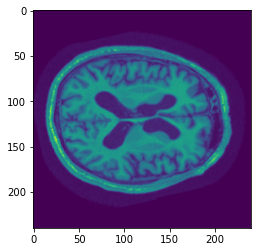

In [32]:
plt.imshow(nib.load(f'/home/jupyter/data/ADNI/MAPER/prep/X/ADNI_MAPER_{s.name}.nii.gz').get_fdata()[:,:,75])

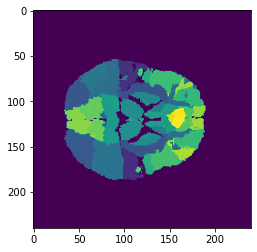

In [39]:
plt.imshow(nib.load(f'/home/jupyter/data/ADNI/MAPER/prep/y/ADNI_MAPER_2_seg.nii.gz').get_fdata()[:,:,75])

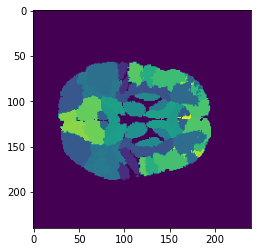

In [40]:
plt.imshow(nib.load(f'/home/jupyter/data/ADNI/MAPER/prep/y/ADNI_MAPER_1_seg.nii.gz').get_fdata()[:,:,75])

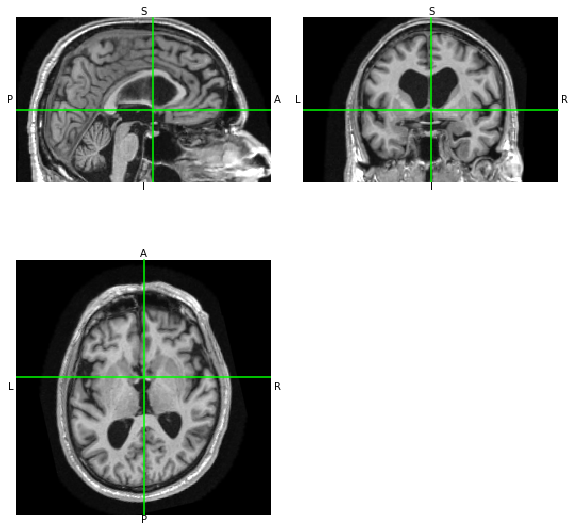

In [135]:
show_mri('/data/slow/MAPER/prep/X/ADNI_MAPER_0.nii', pos=(0,0,0))

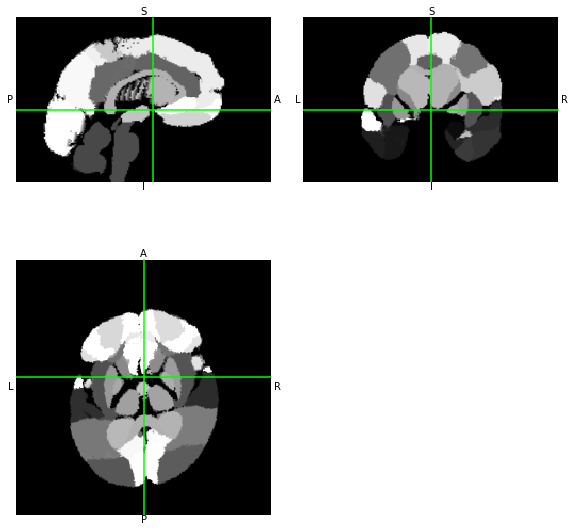

In [136]:
show_mri('/data/slow/MAPER/prep/y/ADNI_MAPER_0_seg.nii', pos=(0,0,0))

In [46]:
df['split'].value_counts()

train    167
test      61
val       57
Name: split, dtype: int64

In [6]:
import numpy as np
import nibabel as nib

labels = set()
for fpath in Path('/home/jupyter/data/ADNI/MAPER/prep/y').glob('ADNI_MAPER_*_seg.nii.gz'):
    labels = labels.union(
        set(np.unique(nib.load(fpath).get_data()))
    )
len(labels)

/opt/conda/envs/bruno/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  import sys


84

In [ ]:
from shutil import copy
import sys

normalizer = {l: i for i,l in enumerate(sorted(labels))}
vec_normalizer = np.vectorize(lambda v: normalizer[v])

nnunet_img_dir = Path('/home/jupyter/gama/nnUNet/data/raw/nnUNet_raw_data/Task112_ADNI_MAPER/imagesTr')
nnunet_label_dir = Path('/home/jupyter/gama/nnUNet/data/raw/nnUNet_raw_data/Task112_ADNI_MAPER/labelsTr')

with open('dataset.json', 'w') as f:
    og_stdout = sys.stdout
    sys.stdout = f
    for s in tqdm(df[df['split'] == 'train'].iloc):
        print('{')

        src_fpath = f'/home/jupyter/data/ADNI/MAPER/prep/X/ADNI_MAPER_{s.name}.nii.gz'
        dst_fpath = nnunet_img_dir/f'ADNI_MAPER_{s.name}_0000.nii.gz'
        !cp {src_fpath} {dst_fpath}
    #     copy(f'/data/slow/MAPER/prep/X/ADNI_MAPER_{s.name}.nii.gz', nnunet_img_dir/f'ADNI_MAPER_{s.name}_0000.nii.gz')
        print(f"\t\"image\": \"./imagesTr/ADNI_MAPER_{s.name}.nii.gz\",")

        seg = nib.load(f'/home/jupyter/data/ADNI/MAPER/prep/y/ADNI_MAPER_{s.name}_seg.nii.gz')
        norm_seg = nib.Nifti1Image(vec_normalizer(np.asanyarray(seg.dataobj)), header=seg.header, affine=seg.affine)
        nib.save(norm_seg, nnunet_label_dir/f'ADNI_MAPER_{s.name}.nii.gz')
        print(f"\t\"label\": \"./labelsTr/ADNI_MAPER_{s.name}.nii.gz\"")

        print('},')

    sys.stdout = og_stdout

0it [00:00, ?it/s]

In [7]:
from brats.preprocessing.hdbet_wrapper import hd_bet

In [26]:
from tqdm.notebook import tqdm

In [28]:
nnunet_task_dir = Path('/home/jupyter/gama/nnUNet/data/raw/nnUNet_raw_data/Task112_ADNI_MAPER')

for img_fpath in tqdm(list(nnunet_task_dir.glob('skull_imagesTr/*.nii.gz'))):
    _, mask_fpath = hd_bet(img_fpath, nnunet_task_dir/'imagesTr'/img_fpath.name.split('.')[0], mode='fast', device='gpu')
    !rm {mask_fpath}

  0%|          | 0/167 [00:00<?, ?it/s]

# Preprocessed data

In [33]:
import nibabel as nib
import numpy as np

In [68]:
maper_dir = Path('/home/jupyter/data/ADNI/MAPER/prep/y')

maper_fpaths = list(maper_dir.glob('*.nii.gz'))
len(maper_fpaths)

285

In [44]:
m_ss = list()
for maper_fpath in maper_fpaths:
    m_img = nib.load(maper_fpath).get_fdata()
    labels_freqs = np.unique(m_img, return_counts=True)
    m_ss.append(pd.Series(labels_freqs[1], labels_freqs[0]))

In [50]:
maper_fpaths

[PosixPath('/home/jupyter/gama/nnUNet/data/raw/nnUNet_raw_data/Task112_ADNI_MAPER/labelsTr/ADNI_MAPER_35.nii.gz'),
 PosixPath('/home/jupyter/gama/nnUNet/data/raw/nnUNet_raw_data/Task112_ADNI_MAPER/labelsTr/ADNI_MAPER_44.nii.gz'),
 PosixPath('/home/jupyter/gama/nnUNet/data/raw/nnUNet_raw_data/Task112_ADNI_MAPER/labelsTr/ADNI_MAPER_92.nii.gz'),
 PosixPath('/home/jupyter/gama/nnUNet/data/raw/nnUNet_raw_data/Task112_ADNI_MAPER/labelsTr/ADNI_MAPER_247.nii.gz'),
 PosixPath('/home/jupyter/gama/nnUNet/data/raw/nnUNet_raw_data/Task112_ADNI_MAPER/labelsTr/ADNI_MAPER_245.nii.gz'),
 PosixPath('/home/jupyter/gama/nnUNet/data/raw/nnUNet_raw_data/Task112_ADNI_MAPER/labelsTr/ADNI_MAPER_141.nii.gz'),
 PosixPath('/home/jupyter/gama/nnUNet/data/raw/nnUNet_raw_data/Task112_ADNI_MAPER/labelsTr/ADNI_MAPER_54.nii.gz'),
 PosixPath('/home/jupyter/gama/nnUNet/data/raw/nnUNet_raw_data/Task112_ADNI_MAPER/labelsTr/ADNI_MAPER_216.nii.gz'),
 PosixPath('/home/jupyter/gama/nnUNet/data/raw/nnUNet_raw_data/Task112_ADNI_

In [53]:
(m_ss[0] == m_ss[1]).all()

True

In [59]:
m_img.shape

(240, 240, 155)

In [87]:
(np.array(nib.load(df['SEG'].iloc[0].replace('/data/slow', '/home/jupyter/data/ADNI')).get_fdata()) == np.array(nib.load(df['SEG'].iloc[-23].replace('/data/slow', '/home/jupyter/data/ADNI')).get_fdata()))

/opt/conda/envs/bruno/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


False

In [95]:
import matplotlib.pyplot as plt

/opt/conda/envs/bruno/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """Entry point for launching an IPython kernel.


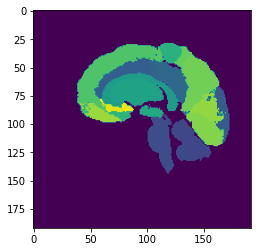

In [96]:
plt.imshow(np.array(nib.load(df['SEG'].iloc[0].replace('/data/slow', '/home/jupyter/data/ADNI')).get_data())[:,:,80,0])

/opt/conda/envs/bruno/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """Entry point for launching an IPython kernel.


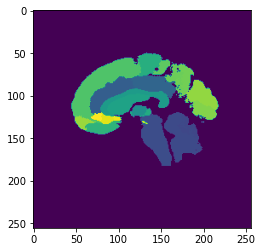

In [100]:
plt.imshow(np.array(nib.load(df['SEG'].iloc[-22].replace('/data/slow', '/home/jupyter/data/ADNI')).get_data())[:,:,83,0])

In [99]:
np.array(nib.load(df['SEG'].iloc[-22].replace('/data/slow', '/home/jupyter/data/ADNI')).get_fdata()).shape

(256, 256, 166, 1)

In [38]:
help(pd.Series)

Help on class Series in module pandas.core.series:

class Series(pandas.core.base.IndexOpsMixin, pandas.core.generic.NDFrame)
 |  Series(data=None, index=None, dtype=None, name=None, copy=False, fastpath=False)
 |  
 |  One-dimensional ndarray with axis labels (including time series).
 |  
 |  Labels need not be unique but must be a hashable type. The object
 |  supports both integer- and label-based indexing and provides a host of
 |  methods for performing operations involving the index. Statistical
 |  methods from ndarray have been overridden to automatically exclude
 |  missing data (currently represented as NaN).
 |  
 |  Operations between Series (+, -, /, *, **) align values based on their
 |  associated index values-- they need not be the same length. The result
 |  index will be the sorted union of the two indexes.
 |  
 |  Parameters
 |  ----------
 |  data : array-like, Iterable, dict, or scalar value
 |      Contains data stored in Series. If data is a dict, argument order